# Topics Covered
-   Image Transformation

# **Image Transformations**

### **1. Upscaling image by factor of k**
Label images can be scaled using transformation matrices. We use homogenous coordinates for transformation. The transformation matrix used for scaling is:
$$ T = \begin{bmatrix} S_x& 0&t_x\\ 0 &S_y&t_y \\ 0&0&1\end{bmatrix} $$

To obtain the scaled coordinates, the original coordinates are multiplied by transformation matrix.
$$\begin{bmatrix}x'\\y'\\1 \end{bmatrix} = T * \begin{bmatrix}x\\y\\1 \end{bmatrix}$$

To fill in the missing values of coordinates, we can use:
 - Interpolation
 - Pooling


### **2. Rotate by angle of theta**

Images can be rotated using rotation matrices. The transformation matrix used for rotation is:
$$ R = \begin{bmatrix} \cos{\theta}& -\sin{\theta}&0\\ \sin{\theta} &\cos{\theta}&0 \\ 0&0&1\end{bmatrix} $$


To obtain the pixel values after rotation, we resample from the original image using inverse transformations.

###### get images

###### Image rotation

(-0.5, 224.5, 224.5, -0.5)

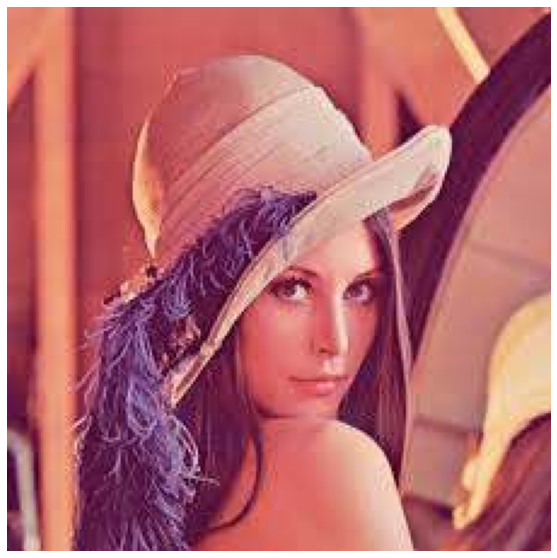

In [24]:
img = cv2.imread("../images/lenna.jpeg")
img =  cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')

In [25]:
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

In [26]:
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([[np.cos(angle), -np.sin(angle), 0],[np.sin(angle),  np.cos(angle), 0],[0, 0, 1] ])


In [27]:
def get_translation(tx, ty):
    return np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1] ])

In [28]:
def get_scale(sx,sy):
    return np.array([[sx, 0, 0],[0, sy, 0],[0, 0, 1] ])

In [35]:
def rotate(img,theta, retain = False):
    h,w,_= img.shape
    tx, ty = np.array((w  // 2, h  // 2))
    angle = np.radians(theta)

    if(retain==False):
        R = get_rotation(theta)
        T = get_translation(tx,ty)

        op_matrix = T @ R   @ np.linalg.inv(T)


        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)
        x2, y2 = coords[0], coords[1]
        warp_coords = (op_inv@coords).astype(np.int32)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]


        indices = np.where((x1 >= 0) & (x1 < h) &
                           (y1 >= 0) & (y1 < w))

        xpix1, ypix1 = x2[indices], y2[indices]
        xpix2, ypix2 = x1[indices], y1[indices]
        canvas = np.zeros_like(img)

        for i in range(len(ypix2)-1):
            canvas[ int(xpix1[i]), int(ypix1[i])] =  img[int(xpix2[i]), int(ypix2[i])]

    else:
        R = get_rotation(theta)
        T = get_translation(tx,ty)

        op_matrix = T @ R  @ np.linalg.inv(T)

        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)

        x2, y2 = coords [0], coords[1]
        warp_coords = (op_inv@coords)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]

        x_min = min(x1)
        x_max = max(x1)
        y_min = min(y1)
        y_max = max(y1)
        nh = x_max-x_min
        nw = y_max-y_min


        sx = h/nh
        sy = w/nw

        S = get_scale(sx,sy)
        op_matrix = T @ R @ S  @ np.linalg.inv(T)

        op_inv = np.linalg.inv(op_matrix)
        coords = get_grid(h,w, True)

        x2, y2 = coords [0], coords[1]
        warp_coords = (op_inv@coords)
        x1, y1 = warp_coords[0, :], warp_coords[1, :]


        indices = np.where((x1 >= 0) & (x1 < h) & (y1 >= 0) & (y1 < w))

        xpix1, ypix1 = x2[indices], y2[indices]
        xpix2, ypix2 = x1[indices], y1[indices]
        canvas = np.zeros_like(img)

        for i in range(len(ypix2)-1):
            canvas[ int(xpix1[i]), int(ypix1[i])] =  img[int(xpix2[i]), int(ypix2[i])]



    return canvas

(-0.5, 224.5, 224.5, -0.5)

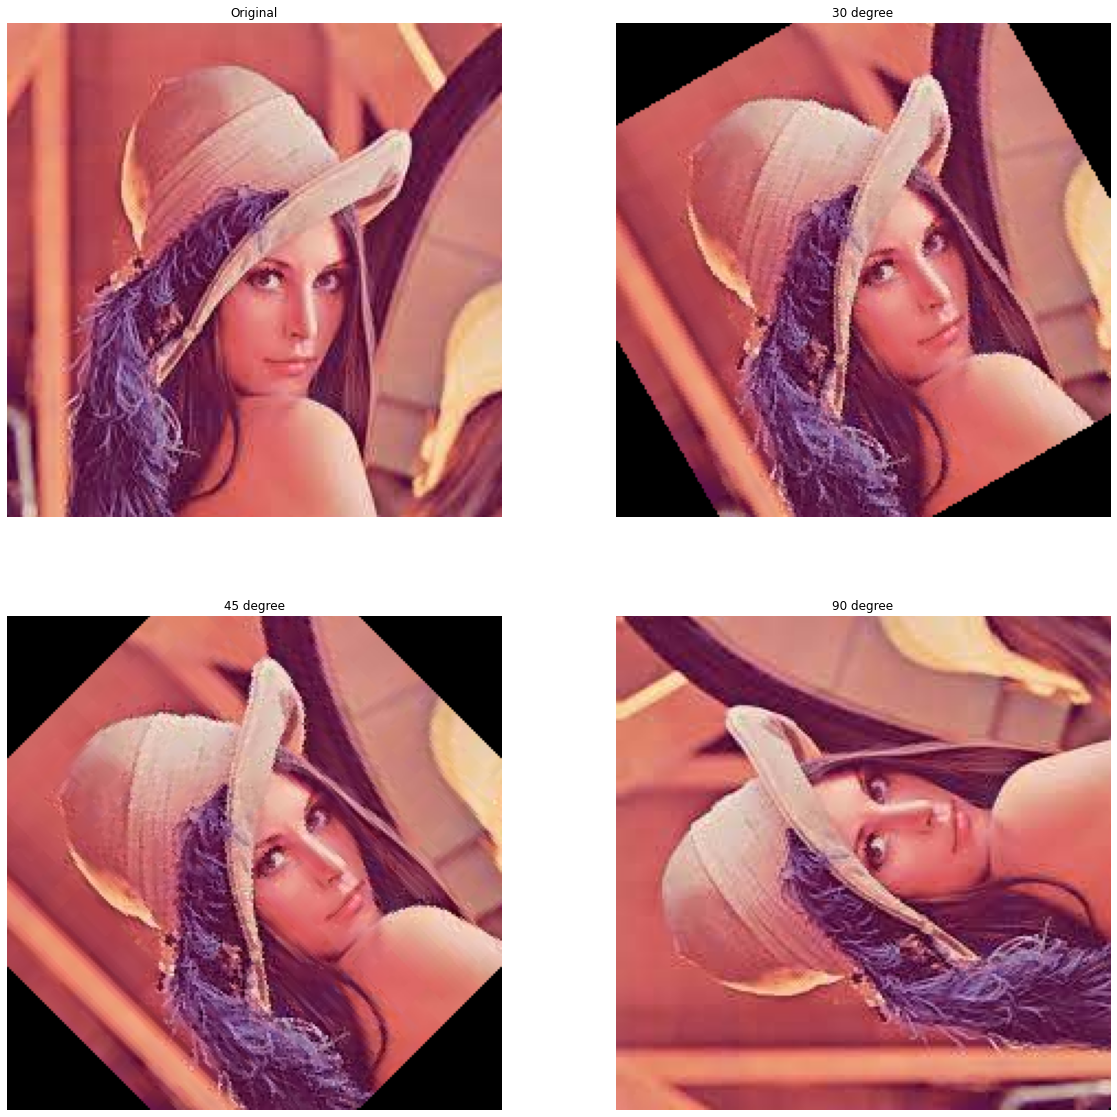

In [36]:
#Rotate images
rot_img_30= rotate(img,30)
rot_img_45= rotate(img,45)
rot_img_90= rotate(img,90)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
ax.set_title("Original")
ax.imshow( img)
ax.axis('off')

ax = fig.add_subplot(222)
ax.set_title("30 degree")
ax.imshow(rot_img_30)
ax.axis('off')

ax = fig.add_subplot(223)
ax.set_title("45 degree")
ax.imshow(rot_img_45)
ax.axis('off')

ax = fig.add_subplot(224)
ax.set_title("90 degree")
ax.imshow(rot_img_90)
ax.axis('off')


Retain the whole image


(-0.5, 224.5, 224.5, -0.5)

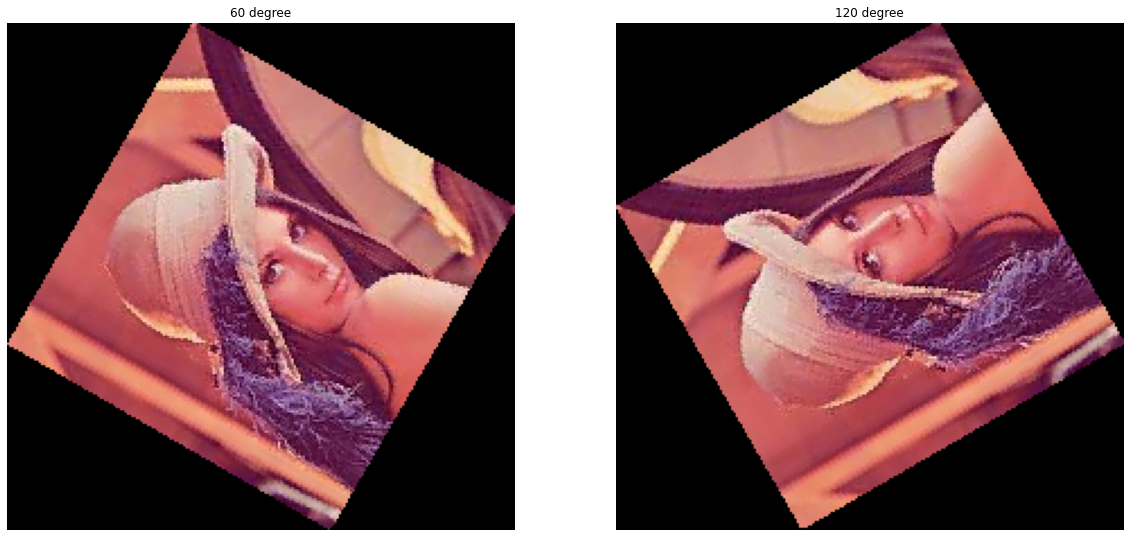

In [37]:
#Rotate image
print("Retain the whole image")
rot_img_60= rotate(img,60,True)
rot_img_120= rotate(img,120,True)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(121)
ax.set_title("60 degree")
ax.imshow(rot_img_60)
ax.axis('off')

ax = fig.add_subplot(122)
ax.set_title("120 degree")
ax.imshow(rot_img_120)
ax.axis('off')

